In [1]:
import numpy as np
import matplotlib.pyplot as plt

import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
from chainer import Variable,Chain,config

import princess as ohm

In [2]:
D = 100
#ndata = np.arange(-5.0,5.0,0.1)
ndata = np.linspace(-5.0,5.0,D)

N = 1
xdata = ndata.reshape(D,N).astype(np.float32)
tdata = (np.sin(xdata) + 2.0*np.sin(2.0*xdata)).astype(np.float32)

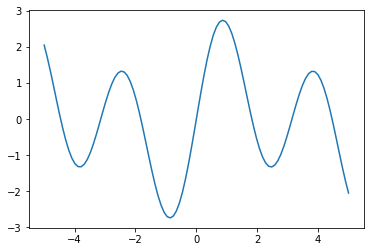

In [3]:
plt.plot(xdata,tdata)
plt.show()

In [4]:
C = 1
H1 = 5
H2 = 5
H3 = 5
layers = {}
layers["l1"] = L.Linear(N,H1)
layers["l2"] = L.Linear(H1,H2)
layers["l3"] = L.Linear(H2,H3)
layers["l4"]=L.Linear(H3,C)
layers["bnorm1"] = L.BatchNormalization(H1)
layers["bnorm2"] = L.BatchNormalization(H2)
layers["bnorm3"] = L.BatchNormalization(H3)
NN = Chain(**layers)

def model(x):
    h = NN.l1(x)
    h = F.relu(h)
    h = NN.bnorm1(h)
    h = NN.l2(h)
    h = F.relu(h)
    h = NN.bnorm2(h)
    h = NN.l3(h)
    h = F.relu(h)
    h = NN.bnorm3(h)
    y = NN.l4(h)
    return y

In [5]:
optNN = Opt.MomentumSGD()
optNN.setup(NN)

In [6]:
train_loss = []
test_loss = []

Dtrain = D//2
xtrain,xtest,ttrain,ttest = ohm.data_divide(Dtrain,D,xdata,tdata)
data = [xtrain,xtest,ttrain,ttest]
result = [train_loss,test_loss]

In [7]:
ohm.learning_regression(model,optNN,data,result,1000)

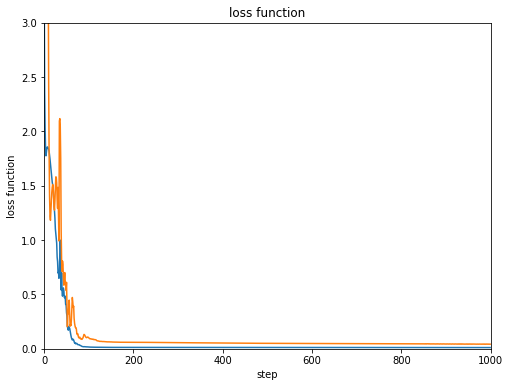

In [8]:
ohm.plot_result2(result[0],result[1],"loss function","step","loss function",0.0,3.0)

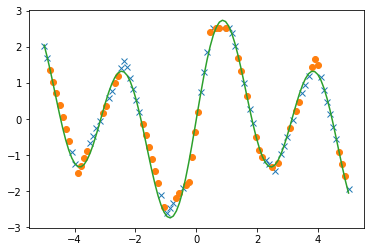

In [9]:
config.train = False
ytrain = model(xtrain).data
ytest = model(xtest).data
plt.plot(xtrain,ytrain,marker="x",linestyle="None")
plt.plot(xtest,ytest,marker="o",linestyle="None")
plt.plot(xdata,tdata)
plt.show()